<a href="https://colab.research.google.com/github/alibagheribardi/Regression/blob/main/saleh_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

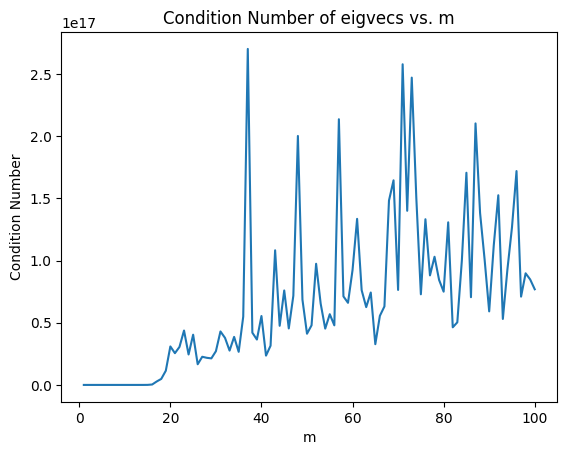

In [ ]:
import numpy as np
from scipy.linalg import block_diag
import matplotlib.pyplot as plt

def compute_eigvecs(N):
    w = np.exp((-2j * np.pi) / N)

    # Construct Fourier matrix F
    F = np.zeros((N, N), dtype=complex)
    for k in range(N):
        for l in range(N):
            F[k, l] = (1 / np.sqrt(N)) * w**(k * l)

    # Construct matrices
    J = np.eye(N - 1)[::-1]
    JJ = block_diag(np.ones(1), J)
    I = np.eye(N)

    # Compute projection matrices
    P_plus1 = (1/4) * (I + JJ) + (1/4) * (I + JJ) @ F
    P_minus1 = (1/4) * (I + JJ) - (1/4) * (I + JJ) @ F
    P_plusi = (1/4) * (I - JJ) - 1j * (1/4) * (I - JJ) @ F
    P_minusi = (1/4) * (I - JJ) + 1j * (1/4) * (I - JJ) @ F

    # Extract eigenvectors
    m = (N - 1) // 4
    V_plus1 = P_plus1[:, :m+1]
    V_minus1 = P_minus1[:, :m]
    V_plusi = P_plusi[:, 1:m+1]
    V_minusi = P_minusi[:, 1:m+1]


    eigvecs = np.hstack([V_plus1, V_minus1, V_plusi, V_minusi])

    result = np.linalg.inv(eigvecs) @ F  @ eigvecs
    real = np.round( np.real(result) ,2 )
    image =np.round( np.imag(result) ,2 )
    result_round = real + 1j* image

    #print(result_round)


    return eigvecs


conds_F = []
num=100
m_values = np.arange(1, num+1)  # Instead of fixing m=3

for m in m_values:
    N = 4 * m + 1
    eigvecs = compute_eigvecs(N)
    condition_number = np.linalg.cond(eigvecs)
    conds_F.append(condition_number)

# Plot condition numbers
plt.plot(m_values, conds_F)
plt.xlabel("m")
plt.ylabel("Condition Number")
plt.title("Condition Number of eigvecs vs. m")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_V(n):
    m = (n-1)//2
    p = m //2
    #m = 2 * p
    #n = 2 * m + 1

    G = np.zeros((n, n), dtype=complex)
    C = np.zeros((m, m), dtype=float)
    S = np.zeros((m + 1, m + 1), dtype=float)

    w = np.exp(2j * np.pi / n)

    for k in range(n):
        for l in range(n):
            G[k, l] = (1 / np.sqrt(n)) * (w ** ((k + 0.5) * (l + 0.5)))

    for k in range(m):
        for l in range(m):
            C[k, l] = (2 / np.sqrt(n)) * np.cos(((2 * k + 1) * (2 * l + 1) * np.pi) / (2 * n))

    for k in range(m + 1):
        for l in range(m + 1):
            S[k, l] = (2 / np.sqrt(n)) * np.sin(((2 * k + 1) * (2 * l + 1) * np.pi) / (2 * n))

    C2 = C @ C
    S2 = S @ S

    I = np.eye(m)
    C_p = C + I
    C_m = C - I

    v_i = C_p[:, 0:p]
    u_i = C_m[:, 0:p]

    J = np.eye(m)[::-1]
    J_v_i = J @ v_i
    J_u_i = J @ u_i

    zero = np.zeros((1, p))
    result1 = np.concatenate([v_i, zero, -J_v_i], axis=0)
    result2 = np.concatenate([u_i, zero, -J_u_i], axis=0)

    m_s = S.shape[0]
    D = np.eye(m_s)
    D[-1, -1] = 2

    S_p = S + D
    S_m = S - D

    t_i = S_p[:, 0:p]
    z_i = S_m[:, 0:p]
    g = S_p[:, -1]

    J = np.eye(m+1)[::-1]
    J0 = J[1:,:]

    J0_t_i = J0 @ t_i
    J0_z_i = J0 @ z_i
    J0_g = J0 @ g

    new_t_i =  np.concatenate([t_i, J0_t_i], axis=0)
    new_z_i = np.concatenate([z_i, J0_z_i], axis=0)
    new_g = np.concatenate([g, J0_g], axis=0)

    V = np.concatenate([result1, result2, new_t_i, new_g[:, None], new_z_i], axis=1)

    entries =  np.array([1 if i % 2 == 0 else -1 for i in range(n)])
    D = np.diag(entries)

    T =  np.zeros((n,n))
    T[0,-1]=1
    T[1: , :-1] = np.eye(n-1)


    w = np.exp((-2j * np.pi) / n)

    # Construct Fourier matrix F
    F = np.zeros((n, n), dtype=complex)
    for k in range(n):
        for l in range(n):
            F[k, l] = (1 / np.sqrt(n)) * w**(k * l)


    eigvec_F = np.linalg.matrix_power(T , m+1) @ D @ V

    inv_eigvec_F = np.linalg.inv(eigvec_F)

    verify = inv_eigvec_F @ F @ eigvec_F
    real_verify = np.round( np.real(verify),2)
    image_verify = np.round( np.imag(verify),2)

    update_verify =real_verify+1j*image_verify

    #print(update_verify)


    return V , eigvec_F



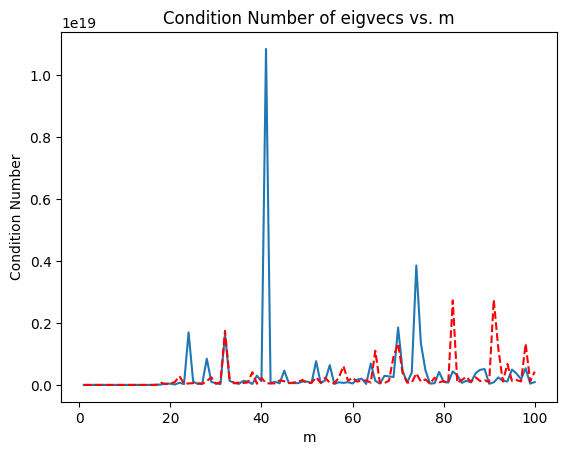

In [ ]:
# Example usage
conds_G = []
cond_GtoF = []
num=100
m_values = np.arange(1, num+1)  # Instead of fixing m=3

for p in m_values:
    N = 4 * p + 1

    eigvecs_G ,  eigves_GtoF = compute_V(N)
    condition_number_G = np.linalg.cond(eigvecs_G)
    condition_number_GtoF = np.linalg.cond(eigves_GtoF)


    conds_G.append(condition_number_G)
    cond_GtoF.append(condition_number_GtoF)

# Plot condition numbers
plt.plot(m_values, conds_G)
plt.plot(m_values, cond_GtoF ,  ls='--' , color = 'red')
plt.xlabel("m")
plt.ylabel("Condition Number")
plt.title("Condition Number of eigvecs vs. m")
plt.show()


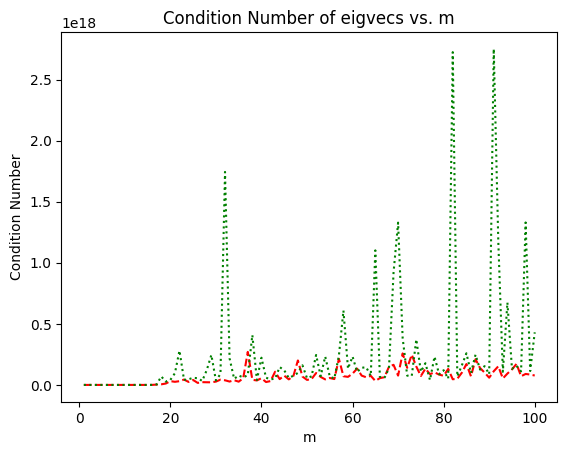

In [ ]:
# Plot condition numbers
#plt.plot(m_values, conds_G)
plt.plot(m_values, conds_F , color ='red' ,  ls='--')
plt.plot(m_values, cond_GtoF , color ='green' ,  ls=':')

plt.xlabel("m")
plt.ylabel("Condition Number")
plt.title("Condition Number of eigvecs vs. m")
plt.show()


In [ ]:
N=4
T =  np.zeros((N,N))
T[0,-1]=1
T[1: , :-1] = np.eye(N-1)

T

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])